In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=50, random_state=1)

#Normalizing the data feature-wise
# print(x.shape)
X = np.zeros_like(x)
print(x.mean(axis=0).shape)
X = (x - np.mean(x, axis=0)).T
# print(x, X)

#Plotting for visualisation

plt.scatter(X[0],X[1])
# plt.scatter(x[:,0],x[:,1])
plt.show()

(2,)


<Figure size 640x480 with 1 Axes>

50
(2, 2)
[0.82520306 0.18215591] [[ 0.95611398  0.29299497]
 [-0.29299497  0.95611398]]


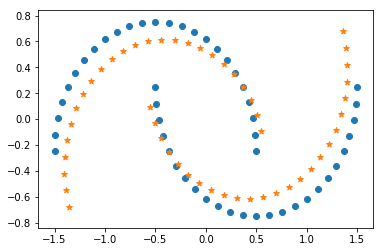

In [2]:
# Classical PCA
N = X.shape[1]
print(N)
Cx = (X@X.T)/ N
print(Cx.shape)
l, Ex = np.linalg.eig(Cx)
P = Ex.T
Y = P@X
print(l,Ex)
# Plotting

plt.scatter(X[0],X[1],marker='o')
plt.scatter(Y[0],Y[1],marker='*')

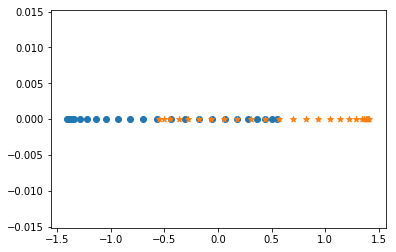

In [3]:
#Finding the max eigenvalue and projecting data
P1 = Ex.T[np.argmax(l)]
Y1 = P1@X

plt.scatter(Y1[np.where(y==0)], np.zeros_like(np.where(y==0)), marker='o')
plt.scatter(Y1[np.where(y==1)], np.zeros_like(np.where(y==1)), marker='*')
plt.show()

Its pretty clear that projecting data into the dimention corresponding to max eigenvalue doesnt help. Hence we need a kernel to project the data into some other higher dimentional space where we can linearly seperate them

In [4]:
def rbf_kernel(x, y, gamma=10):
    lel = np.exp(-gamma * np.linalg.norm(x-y)**2)
    return lel

In [5]:
K = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        K[i,j] = rbf_kernel(X.T[i], X.T[j], gamma=2)
        
One_N_matrix = np.ones((N,N))/N
K1 = K - 2*K@One_N_matrix + One_N_matrix@K@One_N_matrix

K1_eigvals, K1_eigvecs = np.linalg.eigh(K1) 

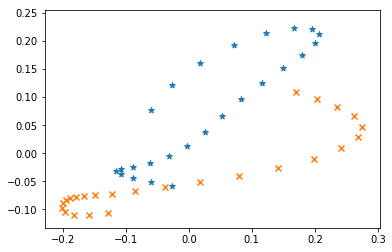

In [6]:
# print(K1_eigvals, K1_eigvecs)
#Chosing most prominent eigvals

lel = np.argsort(K1_eigvals)[-2:]
reqd_eigvals = K1_eigvals[lel]
reqd_eigvecs = K1_eigvecs[lel].T
reqd_eigvecs /= np.sqrt(reqd_eigvals)
Yrbf = K1 @ reqd_eigvecs

plt.scatter(Yrbf[np.where(y==0),0], Yrbf[np.where(y==0),1], marker='*')
plt.scatter(Yrbf[np.where(y==1),0], Yrbf[np.where(y==1),1], marker='x')
plt.show()

In [7]:
K = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        K[i,j] = rbf_kernel(X.T[i], X.T[j], gamma=0.2)
        
One_N_matrix = np.ones((N,N))/N
K1 = K - 2*K@One_N_matrix + One_N_matrix@K@One_N_matrix

K1_eigvals, K1_eigvecs = np.linalg.eigh(K1) 

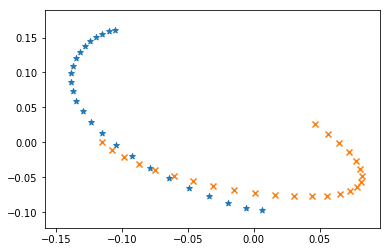

In [8]:
# print(K1_eigvals, K1_eigvecs)
#Chosing most prominent eigvals

lel = np.argsort(K1_eigvals)[-2:]
reqd_eigvals = K1_eigvals[lel]
reqd_eigvecs = K1_eigvecs[lel].T
reqd_eigvecs /= np.sqrt(reqd_eigvals)
Yrbf = K1 @ reqd_eigvecs

plt.scatter(Yrbf[np.where(y==0),0], Yrbf[np.where(y==0),1], marker='*')
plt.scatter(Yrbf[np.where(y==1),0], Yrbf[np.where(y==1),1], marker='x')
plt.show()

As we can see, tweaking with the gamma hyperparameter leads to different plots. Settting the right gamma, we can make the two moons linearly seperable. Hence, Kernel PCA proves their point